<a href="https://colab.research.google.com/github/ProfRTRD/Herramientas-comp/blob/main/RK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.
Mediante la aplicacion del metodo runge-kutta 5, obtenga la solucion de la ecuacion diferencial $\frac{dy}{dx}+2y=x$, con $y(0)=1$

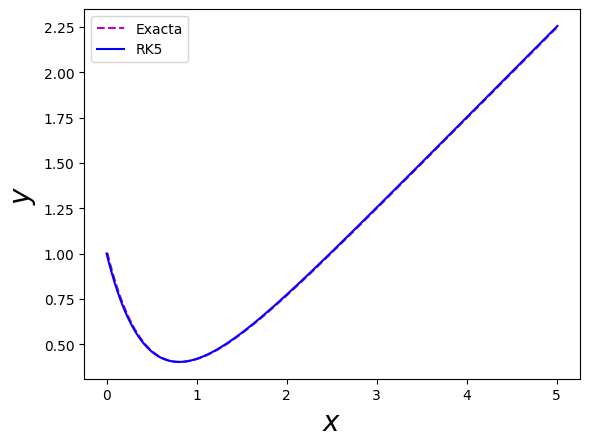

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#definir la funcion
def f(x,y):
  return x - 2*y



#definir el runge kutta
h = 0.01
y = 1
x = 0
X = [x]
Y = [y]
Y_exact = [y]

def phi(a,b,c,d,e):
  A = (7*a + 32*b + 12*c + 32*d + 7*e)/90
  return A

while x <= 5:
  Y_exact.append((2*x+5*np.exp(-2*x)-1)/4)
  k_1 = f(x,y)
  k_2 = f(x + 0.25*h, y + 0.25*k_1*h)
  k_3 = f(x + 0.25*h, y + 0.125*k_1*h + 0.125*k_2*h)
  k_4 = f(x + 0.5*h, y - 0.5*k_2*h + k_3*h)
  k_5 = f(x + 0.75*h, y + (3/16)*k_1*h + (9/16)*k_4*h)
  k_6 = f(x + h, y - (3/7)*k_1*h + (2/7)*k_2*h + (12/7)*k_3 * h - (12/7)*k_4*h + (8/7)*k_5*h)
  y += phi(k_1,k_3,k_4,k_5,k_6) * h
  x += h
  X.append(x)
  Y.append(y)



plt.plot(X,Y_exact,'m--',label='Exacta')
plt.plot(X,Y,'b',label='RK5')
plt.xlabel(r'$x$',size=20)
plt.ylabel(r'$y$',size=20)
plt.legend(loc='upper left')
plt.show()



# 2.
Adopte el metodo RK5 para resolver la ecuacion diferencial que describe el movimiento de una masa en una barra oscilando


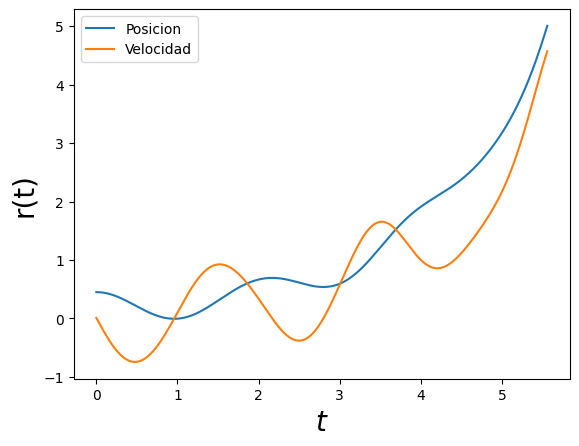

In [12]:
def f(t,x,y):
  return y

def g(t,x,y):
  return (x*np.sin((np.pi*t)*(np.pi**2/12))**2) - 9.81*np.sin((np.pi/12)*np.cos(np.pi*t)) #if something fails check wether theta square is right

x=0.45
y=0.01
t=0
h=0.001
T = [t]
X = [x]
Y = [y]

while x <= 5:
  k_1x = f(t,x,y)
  k_1y = g(t,x,y)
  k_2x = f(t + 0.25*h, x + 0.25*k_1x*h , y + 0.25*k_1*h)
  k_2y = g(t + 0.25*h, x + 0.25*k_1x*h , y + 0.25*k_1*h)
  k_3x = f(t + 0.25*h, x + 0.125*k_1x*h + 0.125*k_2x*h , y + 0.125*k_1y*h + 0.125*k_2y*h)
  k_3y = g(t + 0.25*h, x + 0.125*k_1x*h + 0.125*k_2x*h , y + 0.125*k_1y*h + 0.125*k_2y*h)
  k_4x = f(t + 0.5*h, x - 0.5*k_2x*h + k_3x*h , y - 0.5*k_2y*h + k_3y*h)
  k_4y = g(t + 0.5*h, x - 0.5*k_2x*h + k_3x*h , y - 0.5*k_2y*h + k_3y*h)
  k_5x = f(t + 0.75*h, x + (3/16)*k_1x*h + (9/16)*k_4x*h , y + (3/16)*k_1y*h + (9/16)*k_4y*h)
  k_5y = g(t + 0.75*h, x + (3/16)*k_1x*h + (9/16)*k_4x*h , y + (3/16)*k_1y*h + (9/16)*k_4y*h)
  k_6x = f(t + h, x - (3/7)*k_1x*h + (2/7)*k_2x*h + (12/7)*k_3x * h - (12/7)*k_4x*h + (8/7)*k_5x*h
           , y - (3/7)*k_1y*h + (2/7)*k_2y*h + (12/7)*k_3y * h - (12/7)*k_4y*h + (8/7)*k_5y*h)

  k_6y = g(t + h, x - (3/7)*k_1x*h + (2/7)*k_2x*h + (12/7)*k_3x * h - (12/7)*k_4x*h + (8/7)*k_5x*h
           , y - (3/7)*k_1y*h + (2/7)*k_2y*h + (12/7)*k_3y * h - (12/7)*k_4y*h + (8/7)*k_5y*h)

  x += phi(k_1x,k_3x,k_4x,k_5x,k_6x) * h
  y += phi(k_1y,k_3y,k_4y,k_5y,k_6y) * h
  t += h
  T.append(t)
  X.append(x)
  Y.append(y)

plt.plot(T,X,label='Posicion')
plt.plot(T,Y,label='Velocidad')
plt.legend(loc='upper left')
plt.xlabel('$t$',size=20)
plt.ylabel('r(t)',size=20)
plt.show()